In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv("movies.csv")
df2 = pd.read_csv("TMDB _IMDB_Movies_Dataset.csv")

print("Dataset 1 shape:", df1.shape)
print("Dataset 2 shape:", df2.shape)

Dataset 1 shape: (8560, 6)
Dataset 2 shape: (433937, 13)


In [2]:
# For dataset 1
features1 = ["popularity", "vote_count", "release_date"]
target1 = "vote_average"
X1 = df1[features1].copy()
y1 = df1[target1].copy()

# For dataset 2
# We'll keep: numeric features + categorical features (genres, original_language, adult)
features2 = ["popularity", "vote_count", "release_date", "revenue", "runtime",
             "adult", "original_language", "genres"]
target2 = "vote_average"
X2 = df2[features2].copy()
y2 = df2[target2].copy()

In [3]:
def preprocess_features(X):
    X = X.copy()
    
    # release_date -> release_year
    if "release_date" in X.columns:
        X["release_year"] = pd.to_datetime(X["release_date"], errors="coerce").dt.year
        X["release_year"].fillna(X["release_year"].median(), inplace=True)
        X.drop(columns=["release_date"], inplace=True)
    
    # adult -> 1/0
    if "adult" in X.columns:
        X["adult"] = X["adult"].astype(int)
    
    # genres: take first genre if multiple, for one-hot encoding
    if "genres" in X.columns:
        X["genres"] = X["genres"].fillna("Unknown")
        X["genres"] = X["genres"].apply(lambda x: x.split(",")[0].strip() if isinstance(x, str) else "Unknown")
    
    # Identify categorical and numeric columns
    categorical_cols = [c for c in ["genres", "original_language", "adult"] if c in X.columns]
    numeric_cols = [c for c in X.columns if c not in categorical_cols]
    
    # ColumnTransformer for one-hot + scaling
    preprocessor = ColumnTransformer([
        ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("scale", MinMaxScaler(), numeric_cols)
    ])
    
    X_processed = preprocessor.fit_transform(X)
    return X_processed

X1_processed = preprocess_features(X1)
X2_processed = preprocess_features(X2)

print("Processed Dataset 1 shape:", X1_processed.shape)
print("Processed Dataset 2 shape:", X2_processed.shape)

C:\Users\vipra\AppData\Local\Temp\ipykernel_28152\1613986291.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["release_year"].fillna(X["release_year"].median(), inplace=True)
C:\Users\vipra\AppData\Local\Temp\ipykernel_28152\1613986291.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Processed Dataset 1 shape: (8560, 3)
Processed Dataset 2 shape: (433937, 185)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X2_processed, y2, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel training complete.")

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n===== Linear Regression Results =====")
print("MSE:", mse)
print("R² Score:", r2)


Model training complete.

===== Linear Regression Results =====
MSE: 8.801139618905486
R² Score: 0.10908964632267282


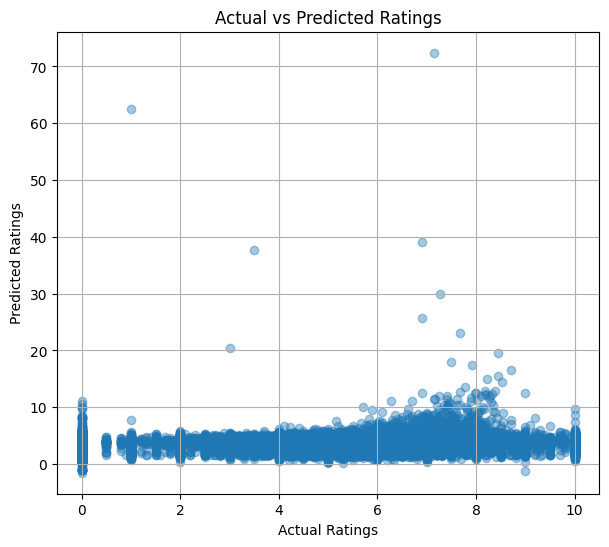

In [5]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.grid(True)
plt.show()